<a href="https://colab.research.google.com/github/Vijay7542/Deep-Learning/blob/master/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Deleting Unnecessary Features


In [7]:
df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [8]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
encoded=encoder.fit_transform(df[["Geography"]]).toarray()
geography_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
geography_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [10]:
df=pd.concat([df,geography_df],axis=1)

In [11]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3397,820,France,Male,33,2,132150.26,2,1,0,23067.97,0,1.0,0.0,0.0
7639,541,France,Male,46,6,0.00,2,1,1,83456.67,0,1.0,0.0,0.0


In [12]:
df.Gender.value_counts()

,count
Gender,
Male,5457
Female,4543


In [13]:
df["Gender_en"]=df["Gender"].replace({"Male":0,"Female":1})

/tmp/ipython-input-1431168281.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender_en"]=df["Gender"].replace({"Male":0,"Female":1})


In [14]:
df.drop(columns=["Geography","Gender"],axis=1,inplace=True)

In [15]:
from sklearn.model_selection import train_test_split

X=df.drop("Exited",axis=1)
y=df["Exited"]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [17]:
print("No of training samples :",X_train.shape[0])
print("No of test samples :",X_test.shape[0])

No of training samples : 8000
No of test samples : 2000


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [40]:
class ChurnNN(nn.Module):
  def __init__(self,input_size):
    super(ChurnNN,self).__init__()
    self.fc1=nn.Linear(input_size,64)
    self.relu=nn.ReLU()
    self.fc2=nn.Linear(64,32)
    self.fc3=nn.Linear(32,16)
    self.output=nn.Linear(16,1)

  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.relu(self.fc3(x))
    x=self.output(x)
    return x


In [41]:
print("No of input features",X_train.shape[1])
model=ChurnNN(input_size=12)


No of input features 12


In [42]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [43]:
X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
X_test_tensor=torch.tensor(X_test,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train.values,dtype=torch.float32).view(-1,1)
y_test_tensor=torch.tensor(y_test.values,dtype=torch.float32).view(-1,1)

In [44]:
epoch=1000

for e in range(epoch):
  model.train()
  optimizer.zero_grad()
  prediction=model(X_train_tensor)
  loss=loss_fn(prediction,y_train_tensor)
  loss.backward()
  optimizer.step()
  if (e+1)%50 ==0:
    print(f"epoch {e+1} out of {epoch} having loss :{loss.item():.4f}")

epoch 50 out of 1000 having loss :0.4680
epoch 100 out of 1000 having loss :0.4201
epoch 150 out of 1000 having loss :0.3798
epoch 200 out of 1000 having loss :0.3302
epoch 250 out of 1000 having loss :0.3142
epoch 300 out of 1000 having loss :0.3008
epoch 350 out of 1000 having loss :0.2867
epoch 400 out of 1000 having loss :0.2718
epoch 450 out of 1000 having loss :0.2592
epoch 500 out of 1000 having loss :0.2501
epoch 550 out of 1000 having loss :0.2419
epoch 600 out of 1000 having loss :0.2349
epoch 650 out of 1000 having loss :0.2294
epoch 700 out of 1000 having loss :0.2247
epoch 750 out of 1000 having loss :0.2199
epoch 800 out of 1000 having loss :0.2151
epoch 850 out of 1000 having loss :0.2109
epoch 900 out of 1000 having loss :0.2068
epoch 950 out of 1000 having loss :0.2030
epoch 1000 out of 1000 having loss :0.2001


In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
model.eval()
with torch.no_grad():
  pred=model(X_test_tensor)
  pred=(pred>=0.5).float()
y_pred=pred.numpy()
y_true=y_test_tensor.numpy()

print("Model Accuracy",accuracy_score(y_true,y_pred))
print("Precision Score",precision_score(y_true,y_pred))
print("Recall Score ",recall_score(y_true,y_pred))
print("f1 Score",f1_score(y_true,y_pred))
print("Confusion Matrix :",confusion_matrix(y_true,y_pred))

Model Accuracy 0.8375
Precision Score 0.603030303030303
Recall Score  0.5063613231552163
f1 Score 0.5504840940525588
Confusion Matrix : [[1476  131]
 [ 194  199]]


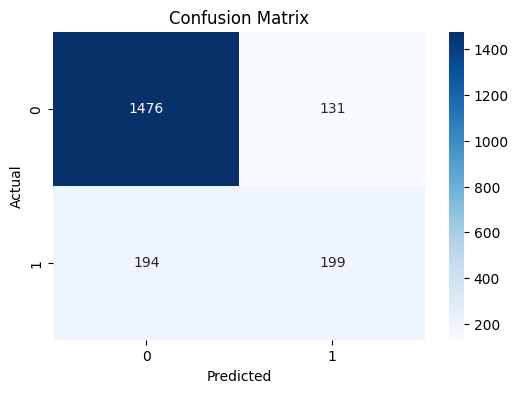

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
